In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal, norm, expon, lognorm
from scipy.linalg import block_diag

from filterpy.kalman.sigma_points import MerweScaledSigmaPoints

from csnukf import ClosedSkewNormal

from scipy.optimize import minimize

# Initialization

In [2]:
%%time

# closed skew normal obsjects
csn_1 = ClosedSkewNormal(
    mu_z = np.array([[ 0.0]]),
    nu_z = np.array([[ 5.0]]),
    Sigma_z = np.array([[ 8.0]]),
    Gamma_z = np.array([[ 5.0]]),
    Delta_z = np.array([[ 3.0]])
)

csn_2 = ClosedSkewNormal(
    mu_z = np.array([[-1.8]]),
    nu_z = np.array([[0.5]]),
    Sigma_z = np.array([[ 1.5]]),
    Gamma_z = np.array([[-2.0]]),
    Delta_z = np.array([[1.0]])
)

csn_3 = ClosedSkewNormal(
    mu_z = np.array([[ 0.0]]),
    nu_z = np.array([[ 0.0]]),
    Sigma_z = np.array([[ 1.0]]),
    Gamma_z = np.array([[ -2.0]]),
    Delta_z = np.array([[ 3.0]])
)

n_samples = int(1e6)
csn1_samples = csn_1.rvs(n_samples)
csn2_samples = csn_2.rvs(n_samples)
csn3_samples = csn_3.rvs(n_samples)

C:\Developments_Personal\csnukf\csnukf\csn.py:371: RuntimeWarning: invalid value encountered in divide
  minus_f_div_g = lambda x : -(f(x)/g(x))


CPU times: total: 8min 38s
Wall time: 1min 6s


# Sum

In [3]:
csn_1add2 = csn_1 + csn_2
csn1add2_samples = csn1_samples + csn2_samples

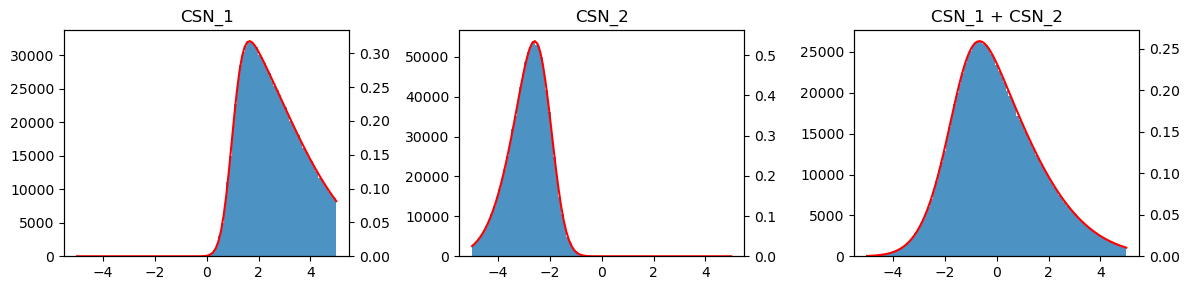

In [4]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3))

bins = np.linspace(-5, 5, 100)

ax = axes[0]
ax.set_title("CSN_1")
ax.hist(csn1_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2")
ax.hist(csn2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_1 + CSN_2")
ax.hist(csn1add2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1add2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()

In [5]:
csn_1add2add3 = csn_1 + csn_2 + csn_3
csn1add2add3_samples = csn1_samples  + csn2_samples + csn3_samples

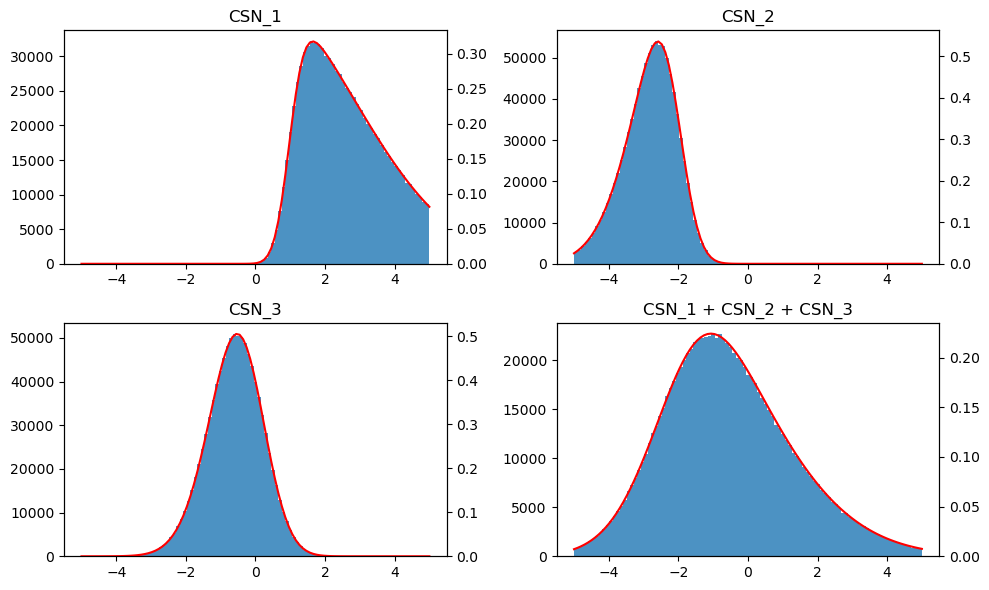

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

bins = np.linspace(-5, 5, 100)

axes = axes.flatten()

ax = axes[0]
ax.set_title("CSN_1")
ax.hist(csn1_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2")
ax.hist(csn2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_3")
ax.hist(csn3_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_3.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[3]
ax.set_title("CSN_1 + CSN_2 + CSN_3")
ax.hist(csn1add2add3_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1add2add3.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()

# Subtraction

In [7]:
csn_1minus2 = csn_1 - csn_2
csn1minus2_samples = csn1_samples - csn2_samples

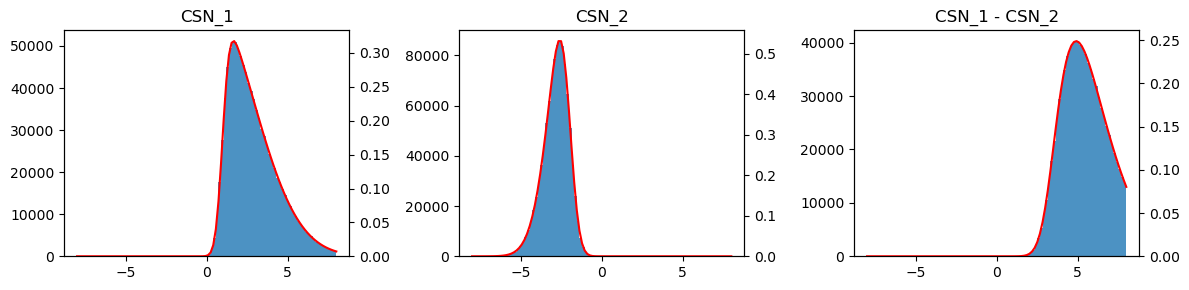

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3))

bins = np.linspace(-8, 8, 100)

axes = axes.flatten()

ax = axes[0]
ax.set_title("CSN_1")
ax.hist(csn1_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2")
ax.hist(csn2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_1 - CSN_2")
ax.hist(csn1minus2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1minus2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()

In [9]:
csn_1minus2add3 = csn_1 - csn_2 + csn_3
csn1minus2add3_samples = csn1_samples  - csn2_samples + csn3_samples

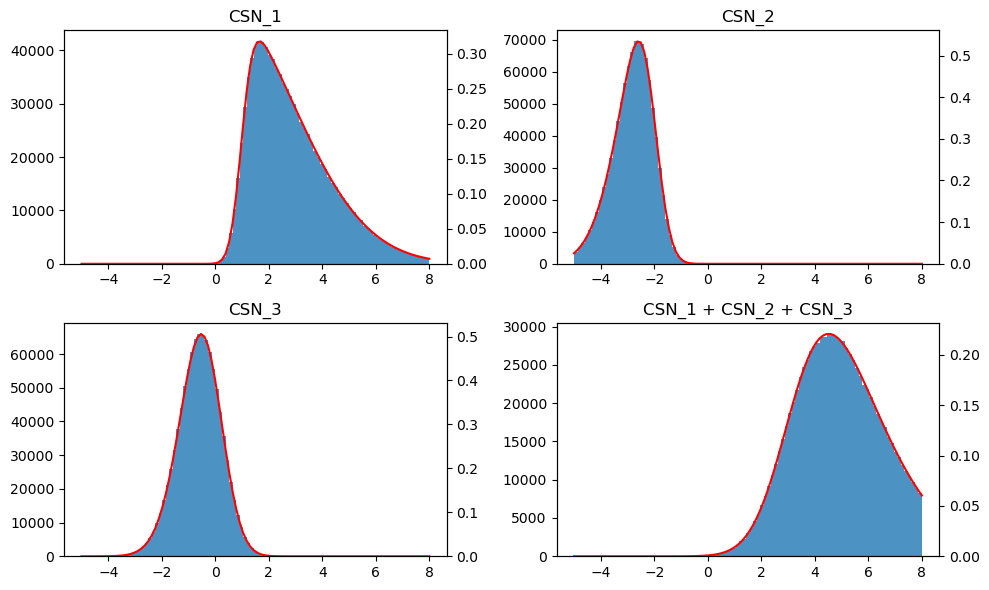

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

bins = np.linspace(-5, 8, 100)

axes = axes.flatten()

ax = axes[0]
ax.set_title("CSN_1")
ax.hist(csn1_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2")
ax.hist(csn2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_3")
ax.hist(csn3_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_3.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[3]
ax.set_title("CSN_1 + CSN_2 + CSN_3")
ax.hist(csn1minus2add3_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1minus2add3.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()

# With constants

In [11]:
csn_2pluspi = csn_2 + np.pi
csn_2minuspi = csn_2 - np.pi
csn_2timespi = csn_2 * np.pi
csn_2divpi = csn_2 / np.pi

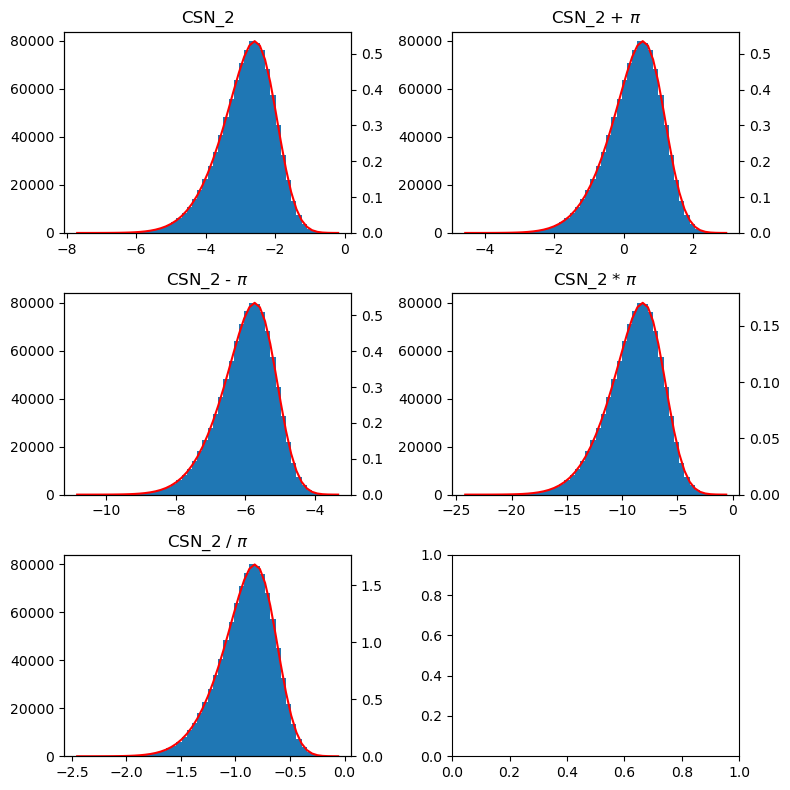

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(8,8))

axes = axes.flatten()

ax = axes[0]
ax.set_title("CSN_2")
x = ax.hist(csn2_samples, bins=50)[1]
axf = ax.twinx()
axf.plot(x, csn_2.pdf_z(x), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2 + $\pi$")
x = ax.hist(csn2_samples + np.pi, bins=50)[1]
axf = ax.twinx()
axf.plot(x, csn_2pluspi.pdf_z(x), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_2 - $\pi$")
x = ax.hist(csn2_samples - np.pi, bins=50)[1]
axf = ax.twinx()
axf.plot(x, csn_2minuspi.pdf_z(x), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[3]
ax.set_title("CSN_2 * $\pi$")
x = ax.hist(csn2_samples*np.pi, bins=50)[1]
axf = ax.twinx()
axf.plot(x, csn_2timespi.pdf_z(x), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[4]
ax.set_title("CSN_2 / $\pi$")
x = ax.hist(csn2_samples/np.pi, bins=50)[1]
axf = ax.twinx()
axf.plot(x, csn_2divpi.pdf_z(x), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()

# log-CSN

In [389]:
mean_X = np.array([-3, 2])
cov_X = np.array(
    [
        [1.1, .6],
        [.6, 1.8]
    ])

In [390]:
def N2logN(mean_X, cov_X):
    mean_Y = np.exp(mean_X + np.diag(cov_X)/2)
    EaEb = np.matmul(np.atleast_2d(mean_Y).T, np.atleast_2d(mean_Y))
    cov_Y = EaEb*(np.exp(cov_X) - 1)
    return mean_Y, cov_Y

In [434]:
CSN_test = ClosedSkewNormal(mu=mean_X, Sigma=cov_X, n=1, q=1)
CSN_test

Closed skew normal object, defined as:
=> conditional distribution z = x|y
   mu_z = [-3]
   nu_z = [-2]
   Sigma_z = [[1.1]]
   Gamma_z = [[0.54545455]]
   Delta_z = [[1.47272727]]
=> two jointly Gaussian random variables
   mu_x = [-3]
   mu_y = [2]
   Sigma_x = [[1.1]]
   Sigma_y = [[1.8]]
   Gamma_xy = [[0.6]].T
   Gamma_yx = [[0.6]]
=> as Gaussian random variable
   n = 1, q = 1
   mu = [-3    2]
   Sigma = [[1.1   0.6]
            [0.6   1.8]]

In [435]:
_params = CSN_test.get_parameters("xy", "dict")
mean_W, cov_W = N2logN(_params["mu_x"], _params["Sigma_x"])
_params["mu_x"] = mean_W
_params["Sigma_x"] = cov_W
logCSN_test = ClosedSkewNormal(**_params)
logCSN_test

Closed skew normal object, defined as:
=> conditional distribution z = x|y
   mu_z = [0.08629359]
   nu_z = [-2.]
   Sigma_z = [[0.01492419]]
   Gamma_z = [[40.20319018]]
   Delta_z = [[-22.32191411]]
=> two jointly Gaussian random variables
   mu_x = [0.08629359]
   mu_y = [2]
   Sigma_x = [[0.01492419]]
   Sigma_y = [[1.8]]
   Gamma_xy = [[0.6]].T
   Gamma_yx = [[0.6]]
=> as Gaussian random variable
   n = 1, q = 1
   mu = [0.08629359   2.        ]
   Sigma = [[0.01492419   0.6       ]
            [0.6          1.8       ]]

In [428]:
a = -1.8
CSN_test.pdf(a), logCSN_test.pdf(a*3.14)

(0.2090551327228892, 0.06428464958914686)

In [429]:
CSN_samples = CSN_test.rvs(n_samples)
logCSN_samples = logCSN_test.rvs(n_samples)

In [430]:
other_samples = 3.14*CSN_samples

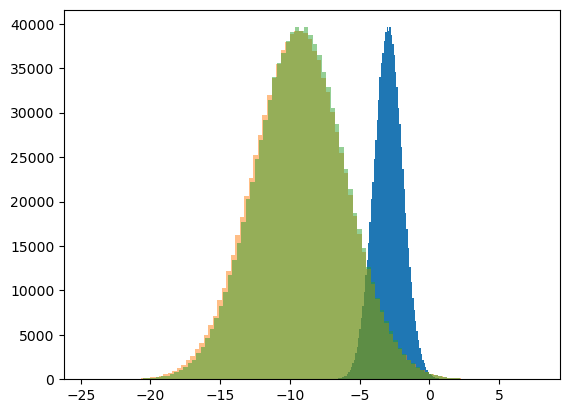

In [431]:
plt.hist(CSN_samples, bins=100)
plt.hist(logCSN_samples, bins=100, alpha=.5)
plt.hist(other_samples, bins=100, alpha=.5)
None

In [418]:
logCSN_samples

array([-10.16915361, -10.22340811, -11.90468697, ...,  -9.7416078 ,
        -7.32731093, -13.51658399])

C:\Users\User\AppData\Local\Temp\ipykernel_28788\3956486538.py:1: RuntimeWarning: invalid value encountered in log
  plt.hist2d(*np.log(mvn_samples.T), bins = np.linspace(0,5, 100))


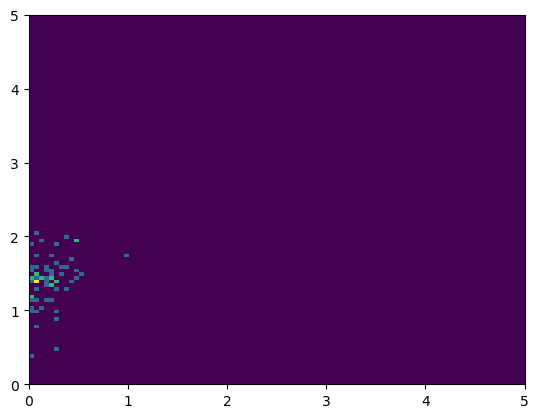

In [419]:
plt.hist2d(*np.log(mvn_samples.T), bins = np.linspace(0,5, 100))
None

In [70]:
def N2logN(mean, std):
    '''
    NORMAL TO LOGNORMAL
    ===================
    
    Converts the mean and standard deviation of a Normal distribution to a 
    LogNormal distribution.
    
    Parameters
    ----------
    mean : float
        Normal mean.
    std : float
        Normal standard deviation.

    Returns
    -------
    l_mean : float
        LogNormal mean.
    l_std : float
        LogNormal standard deviation.

    '''
    l_mean = np.exp(mean + 0.5*std**2)
    l_std2 = np.exp(2*mean + std**2)*(np.exp(std**2) - 1)
    return l_mean, np.sqrt(l_std2)

def logN2N(l_mean, l_std):
    '''
    LOGNORMAL TO NORMAL
    ===================

    Converts the mean and standard deviation of a LogNormal distribution to a 
    Normal distribution.

    Parameters
    ----------
    l_mean : float
        LogNormal mean.
    l_std : float
        LogNormal standard deviation.

    Returns
    -------
    mean : float
        Normal mean.
    std : float
        Normal standard deviation.

    '''
    mean = 2*np.log(l_mean) - 0.5*np.log(l_std**2 + l_mean**2)
    std2 = -2*np.log(l_mean) + np.log(l_std**2 + l_mean**2)
    return mean, np.sqrt(std2)